<a href="https://colab.research.google.com/github/assaflv/final_project/blob/combine_algo/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lazypredict

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("churn.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
percentage_one = (df[df.Exited == 1].sum().Exited)/df.shape[0] #The percentage of labels that are 1
percentage_zero  = (df.shape[0] - percentage_one*df.shape[0])/df.shape[0] #The percentage of labels that are 0
print("The percentage of labels that are 1:",percentage_one,"\n","The percentage of labels that are 0:",percentage_zero)

The percentage of labels that are 1: 0.2037 
 The percentage of labels that are 0: 0.7963


In [ ]:
X = df[['Geography','Gender','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
print(X.shape)
X.head()

(10000, 10)


,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Female,619,42,2,0.00,1,1,1,101348.88
1,Spain,Female,608,41,1,83807.86,1,0,1,112542.58
2,France,Female,502,42,8,159660.80,3,1,0,113931.57
3,France,Female,699,39,1,0.00,2,0,0,93826.63
4,Spain,Female,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
column_that_string = ["Geography","Gender"]
X= pd.get_dummies(X, columns=column_that_string)
print(X.shape)
X.head()

(10000, 13)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0








Creating features:

In [ ]:
Y= df.Exited
print(Y.shape)
Y.head()

(10000,)


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=percentage_one, random_state=42)  
print(" The percentage of labels in the train set are 1:",(y_train.sum())/y_train.shape[0],"\n","The percentage of labels in the test set are 1:",(y_test.sum())/y_test.shape[0])

 The percentage of labels in the train set are 1: 0.20507346477458244 
 The percentage of labels in the test set are 1: 0.19833087874324987


In [ ]:
from sklearn.metrics import confusion_matrix
alpha = 0.2
y_pred= [0]*y_test.shape[0]
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
fp = fp/y_test.shape[0]
fn = fn/y_test.shape[0]
print("for all 0:", 1-(alpha*fp +(1-alpha)*fn) )
y_pred= [1]*y_test.shape[0]
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
fp = fp/y_test.shape[0]
fn = fn/y_test.shape[0]
print("for all 1:", 1-(alpha*fp +(1-alpha)*fn) )

for all 0: 0.8413352970054001
for all 1: 0.83966617574865


 Model 1: Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
KNeighbors= calculat_error(model, X_train, X_test, y_train, y_test,0.2)
print(KNeighbors)

0.8447717231222386


Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
# create Decision Tree Classifer object
model = DecisionTreeClassifier()
DecisionTree = calculat_error(model, X_train, X_test, y_train, y_test,0.2)
print(DecisionTree)

0.8949435444280804


Model 3: Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# initialize a random forest classifier with 1000 decision trees
model = RandomForestClassifier(n_estimators = 1000, random_state = 1) 
# random_state is an arbitrary seed to the random number generator 
RandomForest = calculat_error(model, X_train, X_test, y_train, y_test,0.2)
print(RandomForest)

0.9080019636720668


Model 4: GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GradientBoosting = calculat_error(model, X_train, X_test, y_train, y_test,0.2)
print(GradientBoosting)

0.9094747177221404


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:18<00:00,  1.56it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.86,0.72,0.72,0.85,0.26
XGBClassifier,0.86,0.72,0.72,0.85,0.77
AdaBoostClassifier,0.86,0.72,0.72,0.85,0.49
RandomForestClassifier,0.86,0.71,0.71,0.85,1.13
ExtraTreesClassifier,0.86,0.71,0.71,0.85,0.79
BaggingClassifier,0.85,0.70,0.70,0.84,0.35
NearestCentroid,0.71,0.70,0.70,0.74,0.04
LabelSpreading,0.80,0.67,0.67,0.80,5.29
LabelPropagation,0.80,0.67,0.67,0.80,3.49


Model 5: AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
AdaBoost = calculat_error(model, X_train, X_test, y_train, y_test,0.2)
print(AdaBoost)

0.9106529209621993


Model 6: LGBMClassifier

In [ ]:
# check lightgbm version
import lightgbm
print(lightgbm.__version__)

2.3.1


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
LGBM = calculat_error(model, X_train, X_test, y_train, y_test,0.2)
print(LGBM)

0.913794796269023


Model 7: XGBClassifier

In [ ]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.1.1


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
XGB = calculat_error(model, X_train, X_test, y_train, y_test,0.2)
print(XGB)

0.9116347569955817


In [ ]:
print('KNeighbors:',KNeighbors, '\nDecisionTree: ',DecisionTree, '\nRandomForest:',RandomForest, '\nGradientBoosting:',GradientBoosting,'\nAdaBoost:',AdaBoost,'\n*LGBM:',LGBM,'\n*XGB:',XGB)

KNeighbors: 0.8447717231222386 
DecisionTree:  0.8949435444280804 
RandomForest: 0.9080019636720668 
GradientBoosting: 0.9094747177221404 
AdaBoost: 0.9106529209621993 
*LGBM: 0.913794796269023 
*XGB: 0.9116347569955817


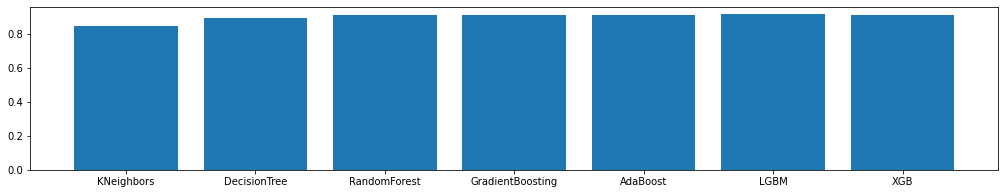

In [ ]:
X_axis = ['KNeighbors', 'DecisionTree', 'RandomForest', 'GradientBoosting','AdaBoost','LGBM','XGB']
y_axis = [ KNeighbors, DecisionTree, RandomForest, GradientBoosting, AdaBoost, LGBM, XGB]
plt.figure(figsize=(59, 3))
plt.subplot(131)
plt.bar(X_axis, y_axis)
plt.show()

Auxiliary function:

when the label ('Exited') is 1 it's mean the custmer left us.
FP = we think its 1 and its 0
FN = we think its 0 and its 1


In [ ]:
def calculat_error(Model,X_train, X_test, y_train, y_test,alpha = 0.2):
  from sklearn.metrics import confusion_matrix
  #print(Model.fit(X_train, y_train).predict(X_test))
  tn, fp, fn, tp = confusion_matrix(y_test, Model.fit(X_train, y_train).predict(X_test)).ravel()
  #print(tn, fp, fn, tp)
  fp = fp/y_test.shape[0]
  fn = fn/y_test.shape[0]
  return 1-(alpha*fp +(1-alpha)*fn) 
  #return 1- np.sum(Model.fit(X_train, y_train).predict(X_test) != y_test)/y_test.shape[0]

In [ ]:
def combine_algo(pred_vectors,W_vectors)
  

In [ ]:
def pred_vector(model,X_train,y_train,y_test):
  return model.fit(X_train, y_train).predict(X_test))

def prediction_process()
  